# Часть 1
### Cоздание массива данных

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_excel('dataset_new.xlsx')
df

,№,Наименование,Год,"Возраст компании, лет",Статус,Организационно-правовая форма,Форма собственности,"Оборотные активы, RUB","Активы всего, RUB","Нераспределенная прибыль (непокрытый убыток), RUB","Долгосрочные обязательства, RUB","Краткосрочные обязательства, RUB","Совокупный долг, RUB","Выручка, RUB",Коэффициент оборачиваемости совокупных активов,Оборотные активы/ТА,Нераспределенная прибыль (непокрытый убыток)/ТА,Долгосрочные обязательства/ТА,Краткосрочные обязательства/ТА,Совокупный долг/ТА,Выручка/ТА,Гос собственность,Частичная,Частная,АО,Гос собственность.1,Сельское хозво,Неком,Кооперативы,ООО
0,1,"(ТУЛАТЕХМАШ), АО",19,29.0,1,0,0,192345000,228294000,-32949000,93533000,158381000,251914000,36594000,0.1425,0.842532,-0.144327,0.409704,0.693759,1.103463,0.160293,0,0,1,1,0,0,0,0,0
1,2,"18 ЦАРЗ, АО",19,11.5,1,0,2,79057000,507607000,-375469000,9007000,466916000,475923000,2173000,0.0041,0.346295,-1.644673,0.039454,2.045240,2.084693,0.009518,0,0,0,1,0,0,0,0,0
2,3,"39 АРСЕНАЛ, АО",19,26.5,1,0,1,209931000,286396000,-199177000,168000,456867000,457035000,44035000,0.1531,0.919564,-0.872458,0.000736,2.001222,2.001958,0.192887,1,2,0,1,0,0,0,0,0
3,4,"94 АРЗ, АО",19,25.5,1,0,1,10463000,233053000,-175760000,1195000,218191000,219386000,3757000,0.0166,0.045831,-0.769884,0.005234,0.955746,0.960980,0.016457,1,2,0,1,0,0,0,0,0
4,5,"АБСОЛЮТ, ООО",19,27.0,1,5,0,63009000,160632000,-78300000,6471000,206861000,213332000,2461000,0.0129,0.275999,-0.342979,0.028345,0.906117,0.934462,0.010780,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19661,19662,"4ФРЭШ, ООО",20,1.5,0,5,0,151849000,166295000,14723000,144000,151378000,151522000,771586000,5.3344,0.665147,0.064491,0.000631,0.663084,0.663714,3.379791,0,0,1,0,0,0,0,0,1
19662,19663,"(КОЛХОЗ) ИМЕНИ ШЕВЧЕНКО, СПК",20,28.0,0,2,0,222633000,472009000,363265000,75981000,8769000,84750000,311983000,0.7227,0.975203,1.591216,0.332821,0.038411,0.371232,1.366584,0,0,1,0,0,1,0,0,0
19663,19664,"ТЭС, АО",20,10.5,1,0,0,79877000,87991000,-21156000,1000,108074000,108075000,17238000,0.1468,0.349887,-0.092670,0.000004,0.473398,0.473403,0.075508,0,0,1,1,0,0,0,0,0
19664,19665,"СФЕРА УПАКОВКИ, ООО",20,5.0,1,5,0,168824000,168824000,4711000,2059000,161944000,164003000,121213000,0.6894,0.739503,0.020636,0.009019,0.709366,0.718385,0.530951,0,0,1,0,0,0,0,0,1


Удаляем пустые значения

In [4]:
df = df.dropna()

Удаляем целевую переменную из датасета

In [5]:
data = df.copy()
Y = data['Статус']
data = data.drop(['Статус'], axis=1)

In [6]:
Y.value_counts()

0    18234
1     1432
Name: Статус, dtype: int64

Создаем числовой массив данных. Убираем текстовые и категориальные переменные.

In [7]:
data_num = data.copy()
data_num = data_num.drop(['№','Наименование', 'Организационно-правовая форма', 'Форма собственности'], axis = 1)

Еще у нас в данных год закодирован двумя значениями: 19 и 20. Закодируем 0, если год 2019 и 1, если 2020

In [44]:
data_num['Год']= pd.get_dummies(data_num['Год'], prefix='Год_20')
data_num['Год'].value_counts()

1    18294
0     1372
Name: Год, dtype: int64

Создаем таблицу корреляций регрессоров с зависимой

In [19]:
corr_matr = data_num.corrwith(Y)

In [20]:
corr_matr = corr_matr.to_dict()
tab = {'indicator': list(corr_matr.keys()) , 'value': list(corr_matr.values())}
tabl = pd.DataFrame(tab, columns = ['indicator','value'])
tabl = tabl.sort_values(by=['value'])

Переменные, которые коррелируют с зависимой переменной с коэффом > 0.05

In [21]:
tabl[abs(tabl['value']) > 0.1]

,indicator,value
11,Нераспределенная прибыль (непокрытый убыток)/ТА,-0.269905
4,"Нераспределенная прибыль (непокрытый убыток), RUB",-0.269905
18,Частная,-0.109416
19,АО,0.119759
2,"Оборотные активы, RUB",0.203612
10,Оборотные активы/ТА,0.203612
5,"Долгосрочные обязательства, RUB",0.223799
12,Долгосрочные обязательства/ТА,0.223799
3,"Активы всего, RUB",0.230376
6,"Краткосрочные обязательства, RUB",0.290329


Создаем массив коэффициентов. Cols - весь массив данных за исключением неотнормированных на TA переменных и за исключением некоторых dummy (чтобы исключить мультиколлинеарность) 

In [22]:
cols = np.array(tabl.indicator)
cols

array(['Нераспределенная прибыль (непокрытый убыток)/ТА',
       'Нераспределенная прибыль (непокрытый убыток), RUB', 'Частная',
       'Сельское хозво', 'Год', 'ООО', 'Неком', 'Кооперативы',
       'Коэффициент оборачиваемости совокупных активов',
       'Возраст компании, лет', 'Выручка/ТА', 'Выручка, RUB',
       'Гос собственность', 'Частичная', 'Гос собственность.1', 'АО',
       'Оборотные активы, RUB', 'Оборотные активы/ТА',
       'Долгосрочные обязательства, RUB', 'Долгосрочные обязательства/ТА',
       'Активы  всего, RUB', 'Краткосрочные обязательства, RUB',
       'Краткосрочные обязательства/ТА', 'Совокупный долг/ТА',
       'Совокупный долг, RUB'], dtype=object)

In [24]:
cols = np.delete(cols, [1, 2, 11, 13, 14, 16, 18, 20, 21, 22, 23, 24])   
cols

array(['Нераспределенная прибыль (непокрытый убыток)/ТА',
       'Сельское хозво', 'Год', 'ООО', 'Неком', 'Кооперативы',
       'Коэффициент оборачиваемости совокупных активов',
       'Возраст компании, лет', 'Выручка/ТА', 'Гос собственность', 'АО',
       'Оборотные активы/ТА', 'Долгосрочные обязательства/ТА'],
      dtype=object)

Корреляционная матрица коэффициентов:

<AxesSubplot:title={'center':'Pearson Correlation of Indicators'}>

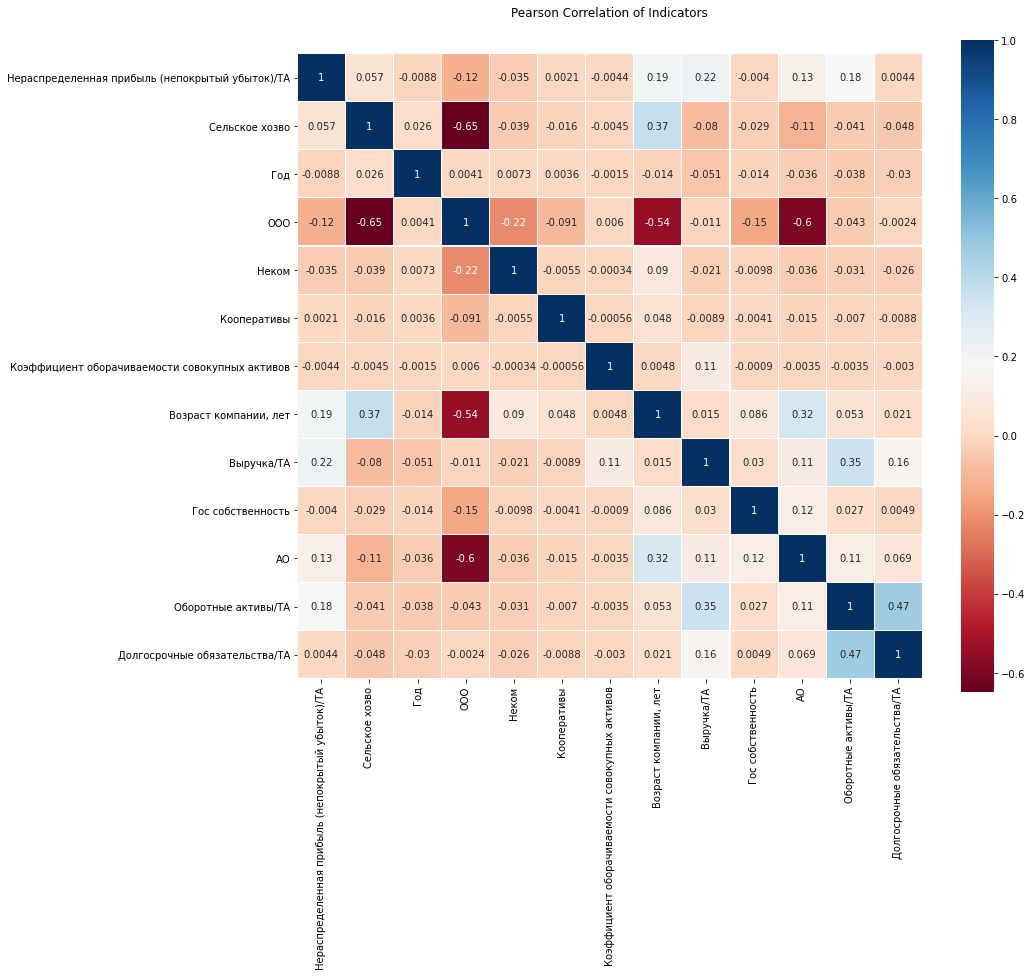

In [25]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Indicators', y=1.05, size=12)
sns.heatmap(data[cols].corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Создаем датасет из списка, содержащего вышеперечисленные переменные

In [26]:
data_final = pd.DataFrame(data_num[cols], columns = cols)

# Часть 2
### Эконометрические модели

Прогоняем логит на данных cols

In [28]:
import statsmodels.api as sm
Logit_model=sm.Logit(Y,data_final)
result=Logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.161745
         Iterations 11
                                         Results: Logit
Model:                          Logit                      Pseudo R-squared:           0.380    
Dependent Variable:             Статус                     AIC:                        6387.7358
Date:                           2021-03-22 21:58           BIC:                        6490.2622
No. Observations:               19666                      Log-Likelihood:             -3180.9  
Df Model:                       12                         LL-Null:                    -5130.1  
Df Residuals:                   19653                      LLR p-value:                0.0000   
Converged:                      1.0000                     Scale:                      1.0000   
No. Iterations:                 11.0000                                                         
-----------------------------------------------------------------

Прогоняем пробит на данных cols

In [30]:
Probit_model=sm.Probit(Y,data_final)
result=Probit_model.fit()
print(result.summary2())

         Current function value: 0.169445
         Iterations: 35
                                        Results: Probit
Model:                          Probit                     Pseudo R-squared:           0.350    
Dependent Variable:             Статус                     AIC:                        6690.6135
Date:                           2021-03-22 21:58           BIC:                        6793.1399
No. Observations:               19666                      Log-Likelihood:             -3332.3  
Df Model:                       12                         LL-Null:                    -5130.1  
Df Residuals:                   19653                      LLR p-value:                0.0000   
Converged:                      0.0000                     Scale:                      1.0000   
No. Iterations:                 35.0000                                                         
------------------------------------------------------------------------------------------------
     

/Users/dariagerasimenko/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


То же самое, но на данных high_corr_cols:

# Часть 3
### Модели машинного обучения

In [32]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [31]:
X = data_final

Делим выборку случайным образом на тренировочную и тестовую. Это нужно, чтобы после обучения на тренировочной,
можно было тестировать точность модели на тестовой.

In [33]:
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size = 0.3)

1) Прогоняем модели к ближайших соседей, смотрим на точность, выбираем наилучший к

In [34]:
train = []
test = []
NN = []

In [35]:
for k in [1, 3, 5, 10, 15, 25]:
    NN.append(k)
    y_predicted_test = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_test)
    test.append(np.mean(y_test==y_predicted_test))
    y_predicted_train = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_train)
    train.append(np.mean(y_train==y_predicted_train))

In [36]:
tab = {'NN': NN, 'Train': train , 'Test': test}
tabl = pd.DataFrame(tab, columns = ['NN','Train', 'Test'])
tabl

,NN,Train,Test
0,1,1.000000,0.936441
1,3,0.961645,0.948136
2,5,0.955107,0.946780
3,10,0.946390,0.944746
4,15,0.945155,0.946441
5,25,0.941958,0.942881


Лучше выбрать 5 соседей

2) прогоняем модели: Случайный лес, Логит регрессию, Градиентный бустинг и КНН (k = 3

In [37]:
import mlxtend
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [38]:
X_tr = np.array(X_train)
y_tr = np.array(y_train)

In [39]:
train = []
test = []
model = []

In [40]:
clf1 = LogisticRegression(random_state=1,
                          solver='newton-cg',
                          multi_class='multinomial')
clf2 = RandomForestClassifier(random_state=1, n_estimators=100)
clf3 =  GradientBoostingClassifier(n_estimators=300)
clf4 = KNeighborsClassifier(n_neighbors = 3)
labels = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'KNN (k = 3)']
for clf, lab in zip([clf1, clf2, clf3, clf4],
                         labels):
    model.append(lab)
    y_predicted_test = clf.fit(X_train, y_train).predict(X_test)
    test.append(np.mean(y_test==y_predicted_test))
    y_predicted_train = clf.fit(X_train, y_train).predict(X_train)
    train.append(np.mean(y_train==y_predicted_train))

In [41]:
tab = {'model': model, 'Train': train , 'Test': test}
tabl = pd.DataFrame(tab, columns = ['model','Train', 'Test'])
tabl

,model,Train,Test
0,Logistic Regression,0.952928,0.952034
1,Random Forest,1.000000,0.981356
2,Gradient Boosting,0.989467,0.980169
3,KNN (k = 3),0.961645,0.948136


Модели, кажется, предсказывают статус очень хорошо, но так как небанкротств значительно больше, чем банкротств,
возникает предположение, что модели хорошо предсказывают только небанкротсва. Посмотрим отдельно на предсказания
каждого из статусов

Это сделаем с помошью confusion matrix и classification report. 
Про confusion matrix читайте тут https://en.wikipedia.org/wiki/Confusion_matrix

Если коротко, то в этих матрицах 2х2 в клетках 11 и 22 верно предсказанные значения, в 12 - ошибочно предсказанные банкротства, в 21 - ошибочные небанкротства

In [42]:
models = [clf1, clf2, clf3, clf4]
for clf, lab in zip(models, labels):
    clf.fit(X_train, y_train)
    print('------------------------'+lab+'------------------------')
    y_train_pred = clf.predict(X_train)
    arg_train = {'y_true':y_train, 'y_pred':y_train_pred}
    print(confusion_matrix(**arg_train))
    print(classification_report(**arg_train)) 

------------------------Logistic Regression------------------------
[[12688    50]
 [  598   430]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     12738
           1       0.90      0.42      0.57      1028

    accuracy                           0.95     13766
   macro avg       0.93      0.71      0.77     13766
weighted avg       0.95      0.95      0.94     13766

------------------------Random Forest------------------------
[[12738     0]
 [    0  1028]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12738
           1       1.00      1.00      1.00      1028

    accuracy                           1.00     13766
   macro avg       1.00      1.00      1.00     13766
weighted avg       1.00      1.00      1.00     13766

------------------------Gradient Boosting------------------------
[[12738     0]
 [  145   883]]
              precision    recall  f1-score   support

  

На тренировочной выборке отлично работают модели Рандомный лес и Градиентный бустинг. Логит и КНН хорошо предсказывают
небанкротства, с банкротствами ошибаются

Проверим теперь на тестовой выборке

In [43]:
models = [clf1, clf2, clf3, clf4]
for clf, lab in zip(models, labels):
    clf.fit(X_test, y_test)
    print('------------------------'+lab+'------------------------')
    y_test_pred = clf.predict(X_test)
    arg_test = {'y_true':y_test, 'y_pred':y_test_pred}
    print(confusion_matrix(**arg_test))
    print(classification_report(**arg_test)) 

------------------------Logistic Regression------------------------
[[5474   22]
 [ 274  130]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5496
           1       0.86      0.32      0.47       404

    accuracy                           0.95      5900
   macro avg       0.90      0.66      0.72      5900
weighted avg       0.95      0.95      0.94      5900

------------------------Random Forest------------------------
[[5496    0]
 [   0  404]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5496
           1       1.00      1.00      1.00       404

    accuracy                           1.00      5900
   macro avg       1.00      1.00      1.00      5900
weighted avg       1.00      1.00      1.00      5900

------------------------Gradient Boosting------------------------
[[5496    0]
 [  22  382]]
              precision    recall  f1-score   support

           0  

Вывод тот же самый. У Рандомного леса и Градиентного бусинга никаких проблем. Эти модели - наилучшие. Рандомный лес предсказывает идеально.